# Rudimentos de Machine Learning

![Colegio Bourbaki](./Images/Bourbaki.png)

## Clasificación Multiclase

La clasificación multiclase es una tarea común en el aprendizaje automático, donde el objetivo es asignar una instancia a una de varias clases o categorías. A diferencia de la clasificación binaria, donde solo hay dos clases posibles, la clasificación multiclase implica tres o más clases entre las cuales una instancia puede ser clasificada. Este tipo de clasificación es fundamental en muchas aplicaciones del mundo real, como el reconocimiento de dígitos escritos a mano, donde cada dígito (0-9) representa una clase diferente, o la categorización de artículos de texto en varios temas.

En la clasificación multiclase, cada instancia se asigna a una y solo una de las varias clases. Por ejemplo, en un sistema de clasificación de empleados por su posición dentro de una empresa, cada empleado sería clasificado como 'Asistente', 'Ejecutivo', 'Gerente' o 'Director', pero no podría ser más de uno al mismo tiempo.

Hay varias estrategias para abordar problemas de clasificación multiclase con modelos que intrínsecamente solo manejan clasificación binaria, como:

* **One-vs-Rest (OvR) o One-vs-All(OvA):** Para cada clase, se entrena un clasificador binario que distingue entre esa clase y todas las demás. Durante la predicción, el clasificador que tenga la mayor confianza en su decisión determina la clase de la instancia.
* **One-vs-One (OvO):** Se entrena un clasificador binario para cada par de clases. Cuando se necesita hacer una predicción, se utiliza el voto mayoritario de los clasificadores entre todos los pares de clases.

Algunos algoritmos, como los árboles de decisión, kNN y ciertas variantes de SVM's, pueden manejar directamente la clasificación multiclase sin necesidad de estrategias adicionales como OvR u OvO.

La evaluación de modelos de clasificación multiclase también requiere métricas específicas, como la precisión multiclase, la matriz de confusión multiclase, y puntuaciones como el F1-score por clase, ya que métricas diseñadas para clasificación binaria, como la precisión o la curva ROC, no capturan la complejidad de predecir correctamente entre múltiples clases.

**Cómo funciona One-vs-Rest / One-vs-All:**

1) División del Problema: En un problema de clasificación con N clases, OvR/OvA crea N clasificadores binarios distintos.
2) Entrenamiento: Cada clasificador se entrena para distinguir una clase específica del resto. Por ejemplo, si tuvieras tres clases (A, B, C), entrenarías tres clasificadores:
* Clasificador 1: Clase A vs. Clases B y C
* Clasificador 2: Clase B vs. Clases A y C
* Clasificador 3: Clase C vs. Clases A y B
3) Predicción: Para hacer una predicción, todos los clasificadores binarios se ejecutan en la instancia no vista. La clase seleccionada es aquella para la cual el clasificador correspondiente tiene la mayor confianza en su predicción (por ejemplo, la mayor probabilidad en modelos probabilísticos).

Ventajas de OvR/OvA:

* Simplicidad: Es un enfoque sencillo que permite utilizar algoritmos de clasificación binaria, que son abundantes, en problemas multiclase.
* Escalabilidad: Aunque el número de clasificadores crece linealmente con el número de clases, este enfoque es relativamente fácil de escalar y paralelizar, ya que cada clasificador se puede entrenar de manera independiente.

Desventajas:

* Desequilibrio de Clases: Cada clasificador binario se enfrenta a un conjunto de datos desequilibrado, ya que la clase de interés suele ser mucho menor que el conjunto de todas las otras clases combinadas.
* Rendimiento: En algunos casos, especialmente cuando las clases no son mutuamente excluyentes en términos de características, otros enfoques como "One-vs-One" o métodos específicos multiclase pueden ofrecer un mejor rendimiento.

En resumen, One-vs-Rest/One-vs-All es una técnica ampliamente utilizada en clasificación multiclase debido a su simplicidad y efectividad en muchos escenarios, aunque siempre es recomendable evaluar diferentes enfoques para encontrar el más adecuado para un problema específico.

**Cómo funciona One-vs-One:**

1) División del Problema: Para un problema con N clases, OvO crea un clasificador binario para cada par de clases, resultando en N⋅(N−1)/2​ clasificadores. Por ejemplo, para 3 clases (A, B, C), se entrenarían 3 clasificadores:
* Clasificador 1: Clase A vs. Clase B
* Clasificador 2: Clase A vs. Clase C
* Clasificador 3: Clase B vs. Clase C

2) Entrenamiento: Cada clasificador se entrena solamente con los datos correspondientes a las dos clases que necesita distinguir, ignorando el resto.
3) Predicción: Para hacer una predicción sobre una nueva instancia, se consulta a todos los clasificadores binarios. La clase que gane la mayoría de los "duelos" binarios es la elegida como la predicción final.

Ventajas de OvO:

* Balance de Clases: Cada clasificador binario se entrena con dos clases, lo que puede ayudar a mitigar el problema del desequilibrio de clases presente en el enfoque OvR.
* Eficiencia en Espacios de Características Pequeños: Para datasets con pocas características pero muchas clases, OvO puede ser más eficiente ya que cada clasificador se entrena solo con un subconjunto de los datos.
* Rendimiento con Algoritmos Específicos: Algunos algoritmos que escalan mal con el tamaño del dataset (por ejemplo, SVM) pueden beneficiarse del enfoque OvO, ya que se entrena cada clasificador con menos datos.

Desventajas:

* Número de Clasificadores: El número de clasificadores crece cuadráticamente con el número de clases, lo que puede ser inmanejable para problemas con muchas clases.
* Costo Computacional: Aunque cada clasificador se entrena con menos datos, el costo total de entrenar y almacenar N⋅(N−1)/2​ clasificadores puede ser alto.
* Decisiones de Frontera: En algunas situaciones, especialmente cuando la instancia a clasificar cae cerca de la frontera entre tres o más clases, el método de votación mayoritaria puede resultar en ambigüedades o decisiones menos claras.

En resumen, One-vs-One es una estrategia efectiva para ciertos tipos de problemas y algoritmos de clasificación, especialmente en casos donde el balance de clases y la eficiencia de entrenamiento en espacios de características pequeños son consideraciones importantes. Sin embargo, el aumento cuadrático en el número de clasificadores necesarios hace que este enfoque sea menos práctico para problemas con un gran número de clases.

### Contexto

La mayoría de los mercados financieros utilizan un mecanismo de negociación electrónica denominado libro de órdenes limitadas para facilitar la negociación de activos (acciones, futuros, opciones, etc.). Los participantes envían (o cancelan) órdenes a este libro de órdenes electrónico. Estas órdenes son solicitudes de compra o venta de una cantidad determinada de un activo a un precio especificado, lo que permite emparejar a compradores con vendedores a un precio mutuamente acordado. Dado que un activo puede negociarse en varios centros de negociación, los participantes pueden elegir a qué centro envían una orden. Por ejemplo, una acción estadounidense puede negociarse en varias bolsas, como NYSE, NASDAQ, Direct Edge o BATS. Al enviar una orden, los participantes suelen seleccionar el mejor centro de negociación disponible en ese momento. Sus decisiones pueden incluir un análisis estadístico de la actividad anterior del centro.

**Objetivos del reto**

Dadas las últimas operaciones y los libros de órdenes de un conjunto de centros de negociación, predecir en qué centro de negociación se ejecutará la siguiente operación.

Para cada fila, queremos predecir en qué centro se ejecutará la siguiente operación. El valor se representa mediante un stock_id aleatorio y el día mediante un day_id aleatorio.

Cada fila proporciona una descripción de seis libros de órdenes, de seis centros de negociación, y un historial de operaciones para el activo correspondiente.

**Libros de órdenes**

En un libro de órdenes figuran las cantidades de un activo que ofrecen actualmente los vendedores (que piden precios más altos) y las cantidades que desean adquirir los compradores (que pujan a precios más bajos). Los seis libros de órdenes (uno por cada centro de negociación) se describen en el conjunto de datos a través de las dos mejores ofertas y las dos mejores demandas (que son, respectivamente, los dos precios de oferta más altos de los compradores y los dos precios de demanda más bajos de los vendedores).

Llamamos volumen agregado a la suma de todas las cantidades en los lados comprador y vendedor (considerando sólo las dos mejores ofertas y las dos mejores demandas) en los seis libros dados.

También definimos el precio medio agregado como la media de la mejor oferta entre los seis libros (es decir, el máximo de las seis mejores ofertas) y la mejor demanda entre los seis libros (es decir, el mínimo de las seis mejores demandas).

Cada uno de los seis libros se describe como sigue:

* La columna «bid» (respectivamente «ask») representa la diferencia entre la mejor oferta (respectivamente la mejor demanda) y el precio medio agregado, expresado en una unidad monetaria fija.

* La columna «bid1» (respectivamente «ask1») representa la diferencia entre la segunda mejor oferta (respectivamente la segunda mejor demanda) y el precio medio agregado, expresado en una unidad monetaria fija.

* La columna «bid_size» (respectivamente «ask_size») representa el número total de valores disponibles a la mejor oferta (respectivamente mejor demanda) dividido por el volumen agregado.

* La columna «bid_size1» (respectivamente «ask_size1») representa el número total de valores disponibles a la segunda mejor oferta (respectivamente a la segunda mejor demanda) dividido por el volumen total.

* La columna «ts_last_update» corresponde a la fecha y hora, expresada en microsegundos desde medianoche (hora local), de la última actualización del libro.

Un valor NAN indica un libro vacío o parcialmente vacío.

Tenga en cuenta que todos los precios se expresan en la misma unidad monetaria fija.

Además, como todos los centros de negociación pertenecen a la misma zona horaria, todas las marcas de tiempo tienen la misma referencia horaria.
Operaciones

Cada fila contiene también una descripción de las diez últimas operaciones (ordenadas de la más reciente a la más antigua) del activo correspondiente. Una operación representa una transacción de una cantidad determinada de un activo a un precio dado entre un comprador y un vendedor. La mayoría de las operaciones son el resultado de la correspondencia entre una orden de un libro de órdenes y una orden entrante, pero también pueden ser el resultado de un mecanismo de negociación diferente, como las subastas. Las operaciones suelen conllevar comisiones, pagadas por el comprador y el vendedor, que varían de un centro de negociación a otro. A continuación se describen las diez operaciones del historial de operaciones:

* Su cantidad ('qty'): el número de valores negociados, dividido por el volumen agregado (definido anteriormente en la sección «Libro de órdenes»).

* Su fecha y hora («tod»): el momento en que se ejecutó la operación, expresado en microsegundos desde medianoche (hora local).

* Su precio («price»), que representa la diferencia entre el precio de la operación y el precio medio agregado (definido en la sección «Cartera de órdenes»), expresado en alguna unidad monetaria fija.

* Su origen («source_id»), que representa el centro de negociación en el que se ejecutó esta operación concreta.

**Descripción de las etiquetas**

Las etiquetas corresponden a los centros de negociación que hay que predecir. Cada uno de los seis centros de negociación está representado por un número entre 0 y 5.

**Descripción del baseline**

El baseline consiste simplemente en tomar el centro de negociación de la operación más reciente en el historial

**Link del reto:** https://challengedata.ens.fr/participants/challenges/40/

### Librerías

In [75]:
# Data Analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#

# Utils
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

### Funciones de ayuda

In [76]:
def plot_correlation_matrix(dataframe, plot_graph=True, return_matrix=False):
    """
    Calculates and optionally plots the lower triangle (including the diagonal) of the correlation matrix 
    of a given DataFrame.
    
    Parameters:
    - dataframe: DataFrame from which to calculate the correlation matrix.
    - plot_graph: If True, displays a heatmap of the lower triangle of the correlation matrix.
    - return_matrix: If True, returns the correlation matrix.
    
    Returns:
    - If return_matrix is True, returns the correlation matrix of the dataframe.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataframe.corr('spearman')
    
    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Plot the correlation matrix heatmap for the lower triangle if requested
    if plot_graph:
        plt.figure(figsize=(40, 30))
        # Use the mask and specify square=True to ensure the heatmap is square shaped
        sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, center=0, cmap="hot", annot=True, fmt=".2f", square=False)
        plt.xticks(rotation=45, horizontalalignment='right')
    
    # Return the correlation matrix if requested
    if return_matrix:
        return correlation_matrix

In [77]:
def high_correlation_features(dataframe, threshold=0.95):
    """
    Identifies and returns pairs of highly correlated features from the given dataframe.

    Parameters:
    - dataframe: A pandas DataFrame containing the dataset.
    - threshold: A float representing the correlation threshold to identify high correlations.

    Returns:
    - A DataFrame with pairs of features that have a correlation coefficient above the threshold.
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Find features with a correlation above the threshold
    # Note: The matrix is symmetric, so we need to filter out one side to avoid duplicates
    high_corr_pairs = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                       .stack()
                       .reset_index())
    high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    high_corr_pairs = high_corr_pairs.loc[abs(high_corr_pairs['Correlation']) > threshold, :]

    return high_corr_pairs

In [78]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,), True labels of the data.
    - y_pred: array-like of shape (n_samples,), Predicted labels.

    Returns:
    - None, displays a confusion matrix.
    """
    # Compute confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for Seaborn's heatmap
    class_labels = ['0', '1', '2', '3', '4', '5']
    confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

    # Plotting the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_df, annot=True, fmt="g", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    print("Los valores de las etiquetas de validación son: ")
    print(pd.DataFrame(y_true).value_counts().to_dict())

### Carga de Datos

In [79]:
# Load the dataset
train_features = pd.read_hdf("./Data/train_dc2020.h5")

In [80]:
# Display the first few rows of each dataset to understand their structure
train_features.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,...,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,0
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,...,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,1
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,...,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,...,0.013886,4,49549010300,0.5,0.006943,1,49549010200,48,64,3
4,15.0,442.0,0.035689,0.071378,-391.0,-397.0,0.035689,0.035689,3.0,0.035689,...,0.035689,2,42452055000,-8.0,0.035689,3,42451072650,52,231,4


In [81]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959506 entries, 0 to 959505
Data columns (total 97 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   (0, ask)             959487 non-null  float32
 1   (0, ask1)            959484 non-null  float32
 2   (0, ask_size)        959487 non-null  float32
 3   (0, ask_size1)       959484 non-null  float32
 4   (0, bid)             959488 non-null  float32
 5   (0, bid1)            959486 non-null  float32
 6   (0, bid_size)        959488 non-null  float32
 7   (0, bid_size1)       959486 non-null  float32
 8   (0, price)           959506 non-null  float32
 9   (0, qty)             959506 non-null  float32
 10  (0, source_id)       959506 non-null  int32  
 11  (0, tod)             959506 non-null  int64  
 12  (0, ts_last_update)  959506 non-null  int64  
 13  (1, ask)             959500 non-null  float32
 14  (1, ask1)            959492 non-null  float32
 15  (1, ask_size)        9

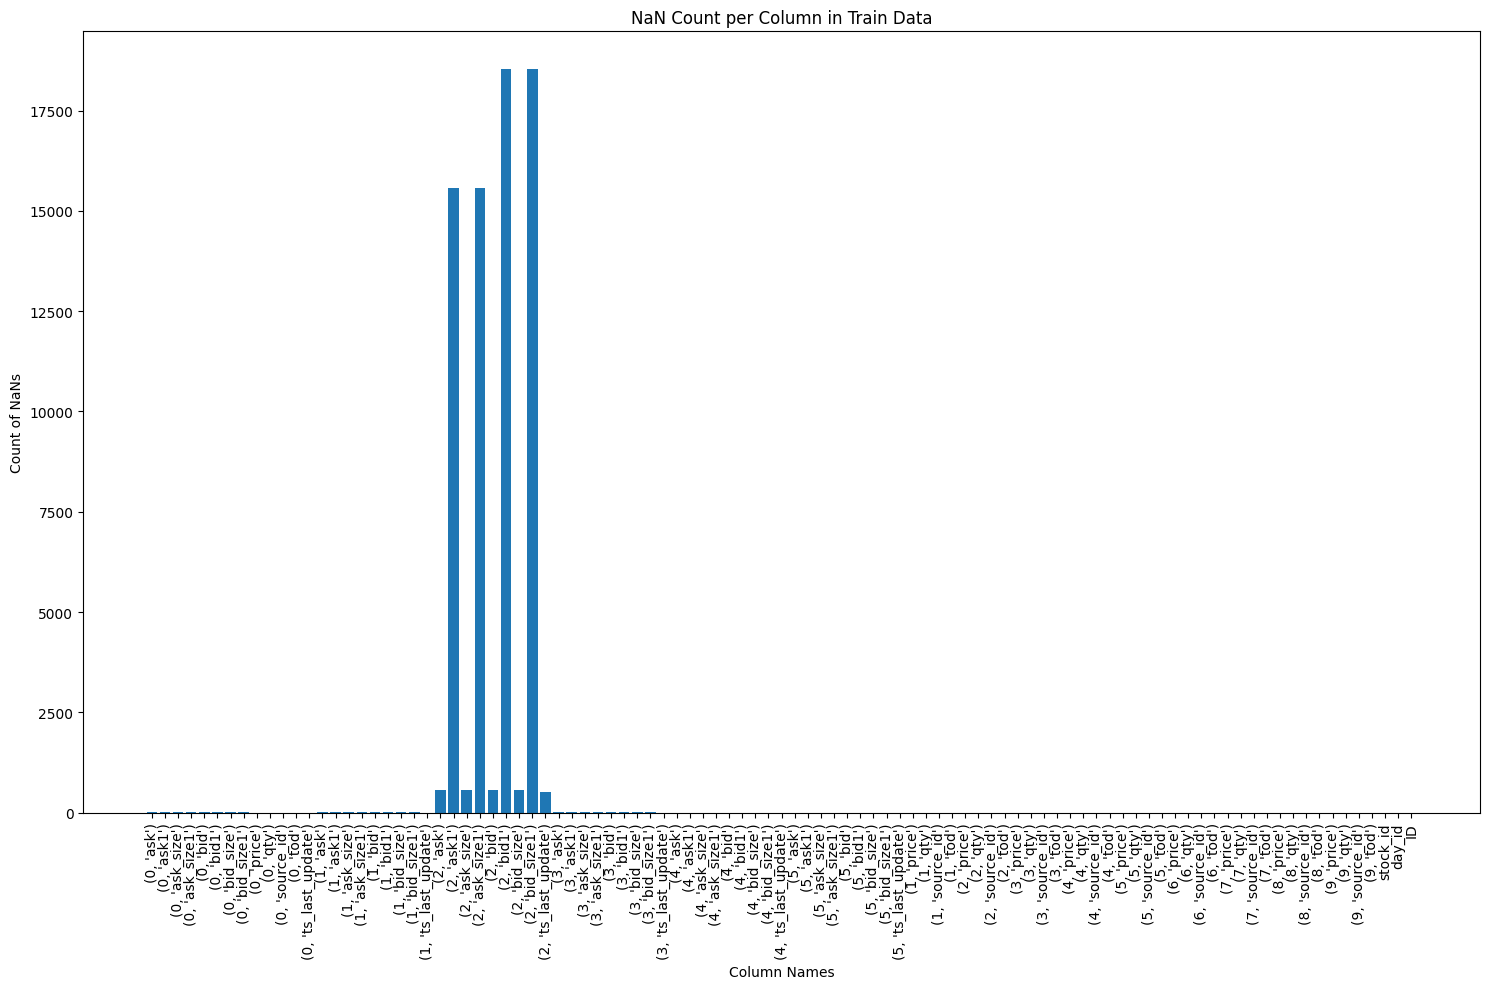

In [82]:
# Get the count of NaNs for each column
nan_counts = train_features.isna().sum()

# Create a numeric index for the x-axis
x = np.arange(len(train_features.columns))

plt.figure(figsize=(15, 10))
plt.bar(x, nan_counts)
plt.xticks(x, train_features.columns, rotation=90)
plt.xlabel("Column Names")
plt.ylabel("Count of NaNs")
plt.title("NaN Count per Column in Train Data")
plt.tight_layout()
plt.show()

In [83]:
train_labels = pd.read_csv("./Data/train_labels.csv")

In [84]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959506 entries, 0 to 959505
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   ID         959506 non-null  int64
 1   source_id  959506 non-null  int64
dtypes: int64(2)
memory usage: 14.6 MB


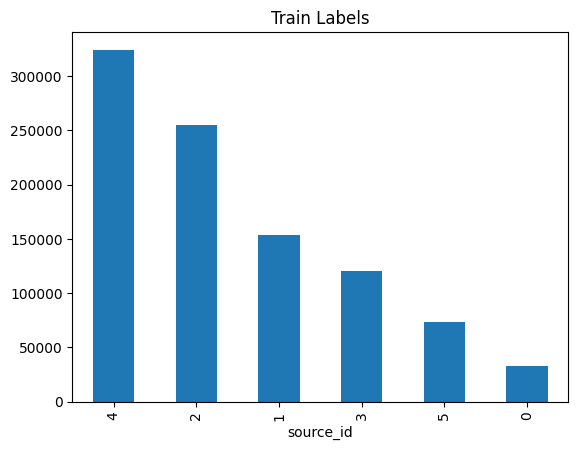

In [85]:
train_labels['source_id'].value_counts().plot(kind='bar', title='Train Labels')
plt.show()

In [86]:
data = pd.merge(train_features, train_labels, on='ID', how='left')

In [87]:
# Compute absolute counts of stock_ID per source_ID
counts_stocks = data.groupby("source_id")["stock_id"].value_counts().unstack(fill_value=0)

# Compute percentage distribution of stock_ID per source_ID
proportions_stocks = (
    data.groupby("source_id")["stock_id"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

percentages_stocks = proportions_stocks * 100

print("Min percent:", percentages_stocks.values.min())
print("Max percent:", percentages_stocks.values.max())

Min percent: 0.014111227833612945
Max percent: 0.8231475040577694


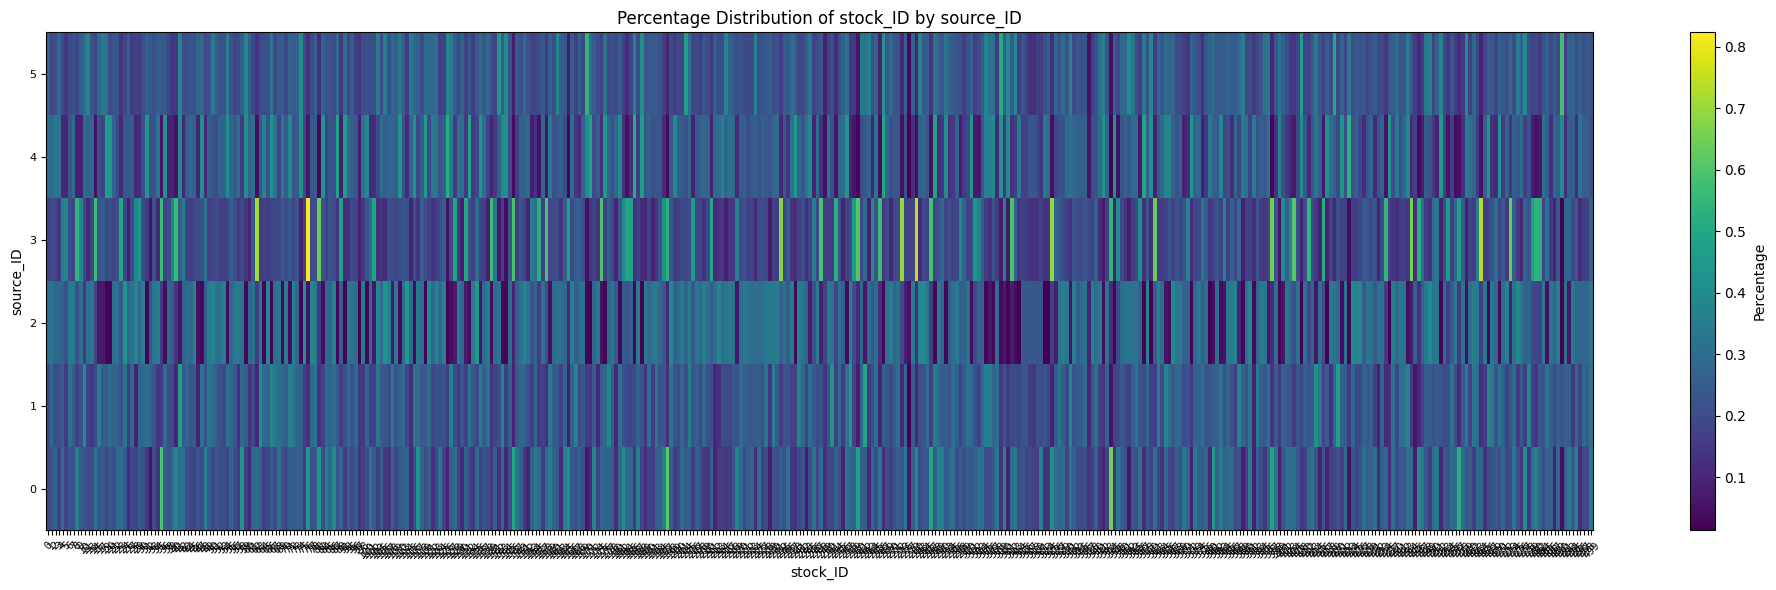

In [88]:
# 1) Heatmap of percentage distribution
plt.figure(figsize=(20, 6))
plt.imshow(percentages_stocks, aspect="auto", origin="lower")
plt.colorbar(label="Percentage")
plt.xticks(
    range(len(percentages_stocks.columns)), percentages_stocks.columns, rotation=45, fontsize=7
)
plt.yticks(range(len(percentages_stocks.index)), percentages_stocks.index, fontsize=8)
plt.xlabel("stock_ID")
plt.ylabel("source_ID")
plt.title("Percentage Distribution of stock_ID by source_ID")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

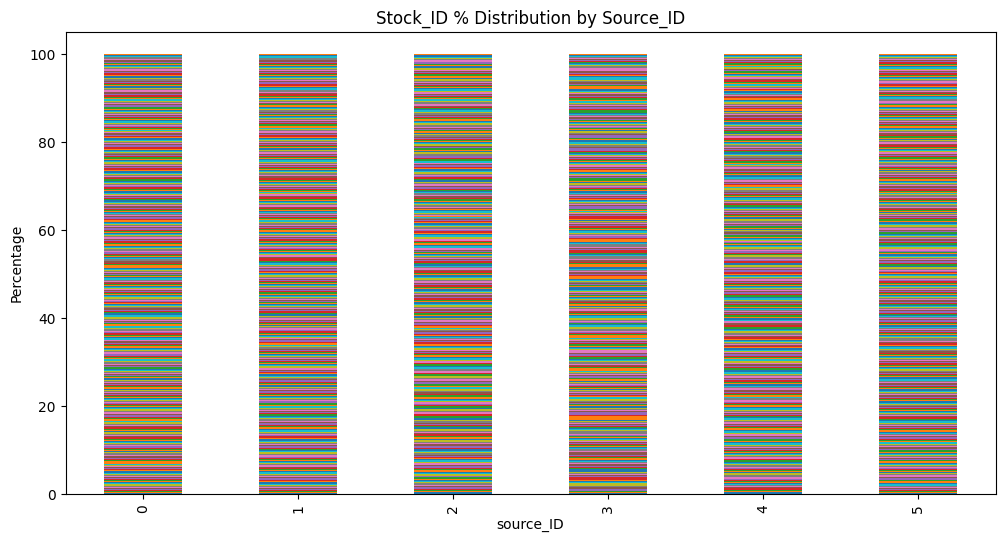

In [89]:
# 2) Stacked bar chart of percentage distribution
plt.figure(figsize=(12, 6))
percentages_stocks.plot(kind="bar", stacked=True, legend=False, figsize=(12, 6))
plt.xlabel("source_ID")
plt.ylabel("Percentage")
plt.title("Stock_ID % Distribution by Source_ID")
plt.show()

In [90]:
# Compute absolute counts of stock_ID per source_ID
counts_days = (
    data.groupby("source_id")["day_id"].value_counts().unstack(fill_value=0)
)

# Compute percentage distribution of stock_ID per source_ID
percentages_days = (
    data.groupby("source_id")["day_id"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    * 100
)

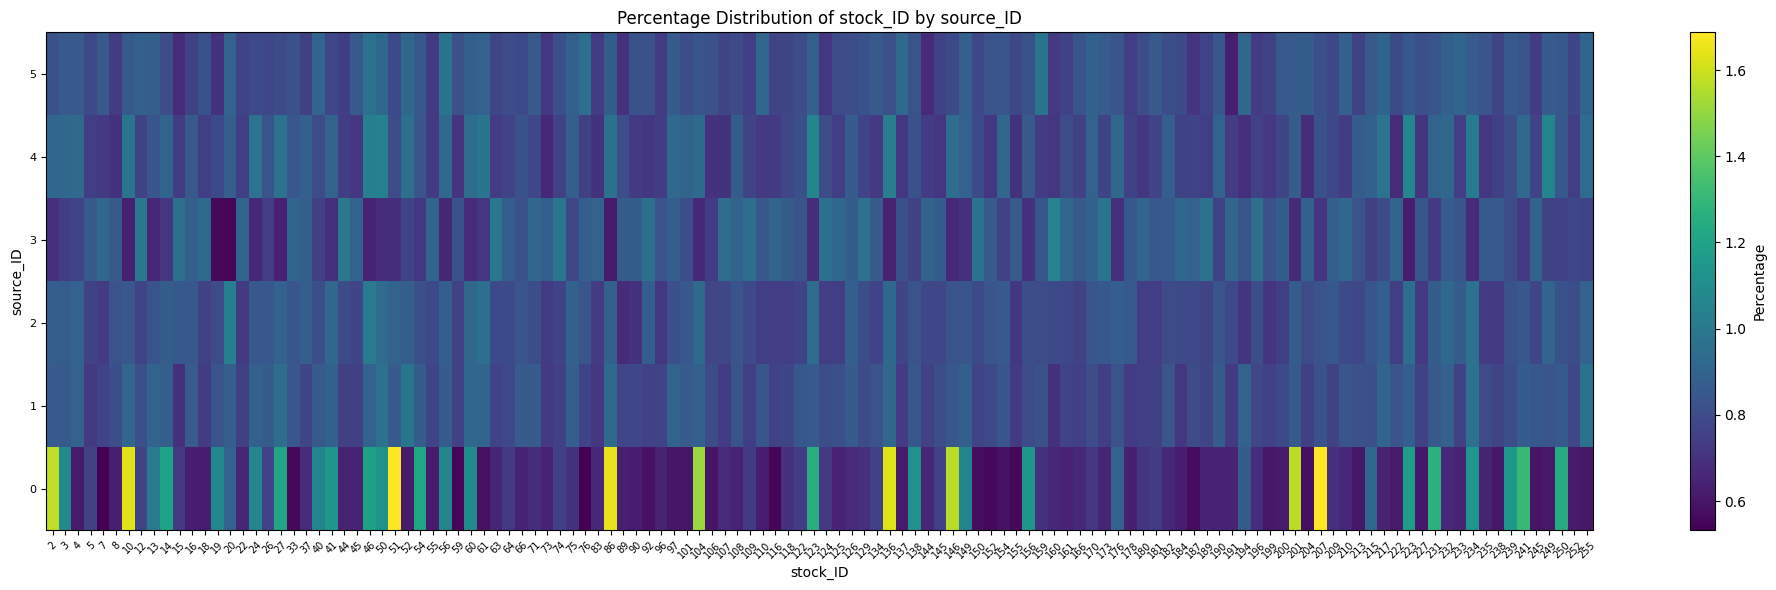

In [91]:
# 1) Heatmap of percentage distribution
plt.figure(figsize=(20, 6))
plt.imshow(percentages_days, aspect="auto", origin="lower")
plt.colorbar(label="Percentage")
plt.xticks(
    range(len(percentages_days.columns)),
    percentages_days.columns,
    rotation=45,
    fontsize=7,
)
plt.yticks(range(len(percentages_days.index)), percentages_days.index, fontsize=8)
plt.xlabel("stock_ID")
plt.ylabel("source_ID")
plt.title("Percentage Distribution of stock_ID by source_ID")
plt.tight_layout()
plt.show()

In [92]:
# Detailed Correlation Analysis focusing on Price
price_correlation = data.corr()["source_id"].sort_values(ascending=False)

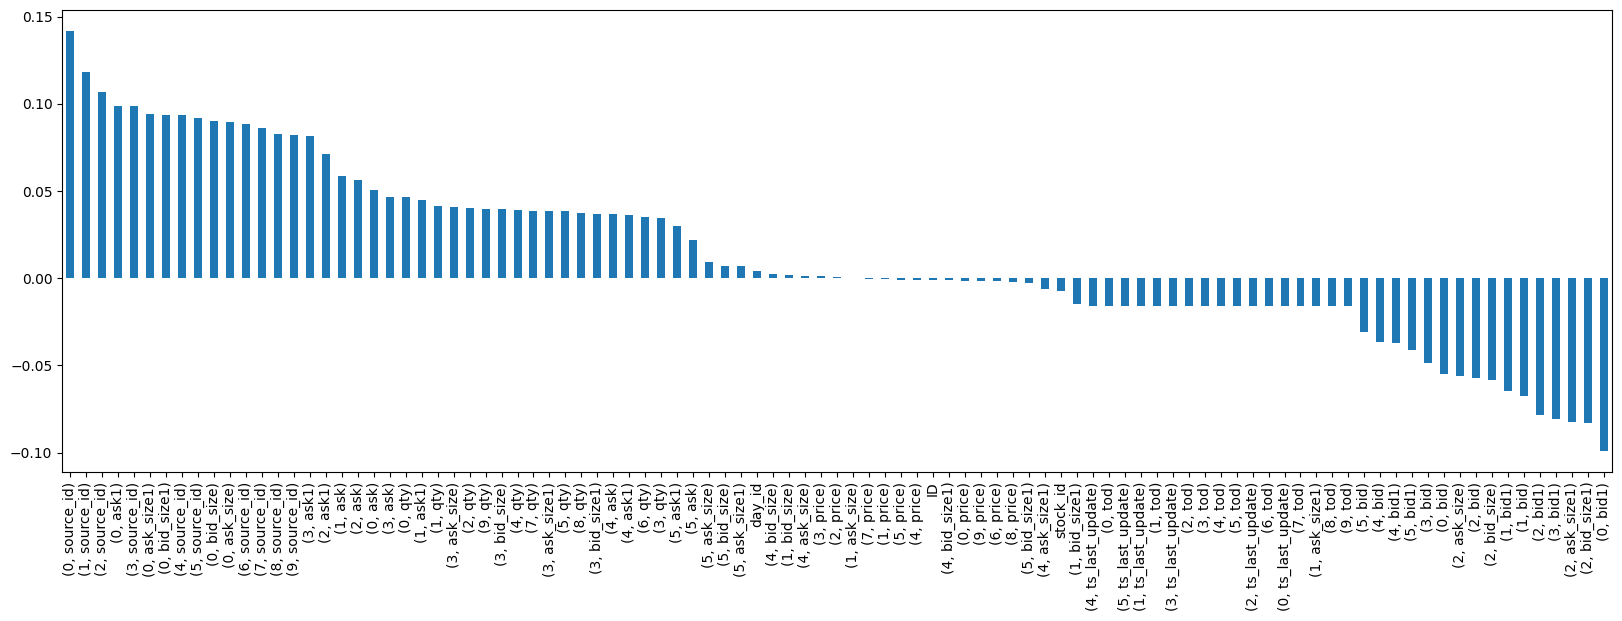

In [93]:
price_correlation.drop(['source_id']).plot(kind="bar", figsize=(20, 6))
plt.show()

In [94]:
# Flatten the multi-index columns into single-level columns.
# Each column label, originally a tuple, becomes a string 'firstlevel_secondlevel'
data.columns = [
    "_".join([str(item) for item in col]).strip("_") if isinstance(col, tuple) else col
    for col in data.columns.values
]

In [95]:
# Now you’ll see columns like: "0_ask", "0_bid", "0_price", "1_ask", ..., "9_tod", "stock_id", "day_id", "ID"
print(data.columns.tolist())

['0_ask', '0_ask1', '0_ask_size', '0_ask_size1', '0_bid', '0_bid1', '0_bid_size', '0_bid_size1', '0_price', '0_qty', '0_source_id', '0_tod', '0_ts_last_update', '1_ask', '1_ask1', '1_ask_size', '1_ask_size1', '1_bid', '1_bid1', '1_bid_size', '1_bid_size1', '1_ts_last_update', '2_ask', '2_ask1', '2_ask_size', '2_ask_size1', '2_bid', '2_bid1', '2_bid_size', '2_bid_size1', '2_ts_last_update', '3_ask', '3_ask1', '3_ask_size', '3_ask_size1', '3_bid', '3_bid1', '3_bid_size', '3_bid_size1', '3_ts_last_update', '4_ask', '4_ask1', '4_ask_size', '4_ask_size1', '4_bid', '4_bid1', '4_bid_size', '4_bid_size1', '4_ts_last_update', '5_ask', '5_ask1', '5_ask_size', '5_ask_size1', '5_bid', '5_bid1', '5_bid_size', '5_bid_size1', '5_ts_last_update', '1_price', '1_qty', '1_source_id', '1_tod', '2_price', '2_qty', '2_source_id', '2_tod', '3_price', '3_qty', '3_source_id', '3_tod', '4_price', '4_qty', '4_source_id', '4_tod', '5_price', '5_qty', '5_source_id', '5_tod', '6_price', '6_qty', '6_source_id', '6_t

In [96]:
def feature_engineering(df):
    # ---- Order-book Features ----
    order_venues = [str(i) for i in range(6)]

    # Create spread features for each venue: spread = ask - bid.
    for v in order_venues:
        # Make sure both columns exist; they might be missing for some venues.
        ask_col = f"{v}_ask"
        bid_col = f"{v}_bid"
        if ask_col in df.columns and bid_col in df.columns:
            df[f"spread_{v}"] = df[ask_col] - df[bid_col]

    # Global order-book features: global best bid and best ask.
    bid_cols = [f"{v}_bid" for v in order_venues if f"{v}_bid" in df.columns]
    ask_cols = [f"{v}_ask" for v in order_venues if f"{v}_ask" in df.columns]
    df["max_bid"] = df[bid_cols].max(axis=1)
    df["min_ask"] = df[ask_cols].min(axis=1)
    df["global_spread"] = df["min_ask"] - df["max_bid"]

    # Time difference features: difference between the most recent trade timestamp and each venue's last update.
    # We assume the most recent trade timestamp is in "0_tod".
    recent_trade_time = df["0_tod"]
    for v in order_venues:
        ts_col = f"{v}_ts_last_update"
        if ts_col in df.columns:
            df[f"time_diff_{v}"] = recent_trade_time - df[ts_col]

    # ---- Trade History Features ----
    trade_indices = [str(i) for i in range(10)]  # trades 0 to 9
    trade_qty_cols = [f"{i}_qty" for i in trade_indices if f"{i}_qty" in df.columns]
    trade_price_cols = [
        f"{i}_price" for i in trade_indices if f"{i}_price" in df.columns
    ]

    # Calculate average trade quantity and price deviation across all 10 trades.
    df["avg_trade_qty"] = df[trade_qty_cols].mean(axis=1)
    df["avg_trade_price"] = df[trade_price_cols].mean(axis=1)
    df["std_trade_price"] = df[trade_price_cols].std(axis=1)

    # Baseline feature: most recent trade venue (from trade group "0")
    if "0_source_id" in df.columns:
        df["recent_trade_venue"] = df["0_source_id"]

    return df

In [97]:
data_dropna = data.dropna()

In [98]:
targets = data_dropna['source_id']
features = data_dropna.drop(columns=['source_id'])

In [99]:
features = feature_engineering(features)

In [100]:
# Define the feature columns. Start with global features, trade history, and then add per-venue features.
feature_columns = [
    "global_spread",
    "avg_trade_qty",
    "avg_trade_price",
    "std_trade_price",
    "recent_trade_venue",
]

# Add per-venue spreads and time difference features.
for i in range(6):
    feature_columns.append(f"spread_{i}")
    feature_columns.append(f"time_diff_{i}")

In [101]:
# Check which features exist in the DataFrame (to account for any missing columns).
existing_features = [col for col in feature_columns if col in features.columns]

In [102]:
x = features[existing_features]

### Correlaciones

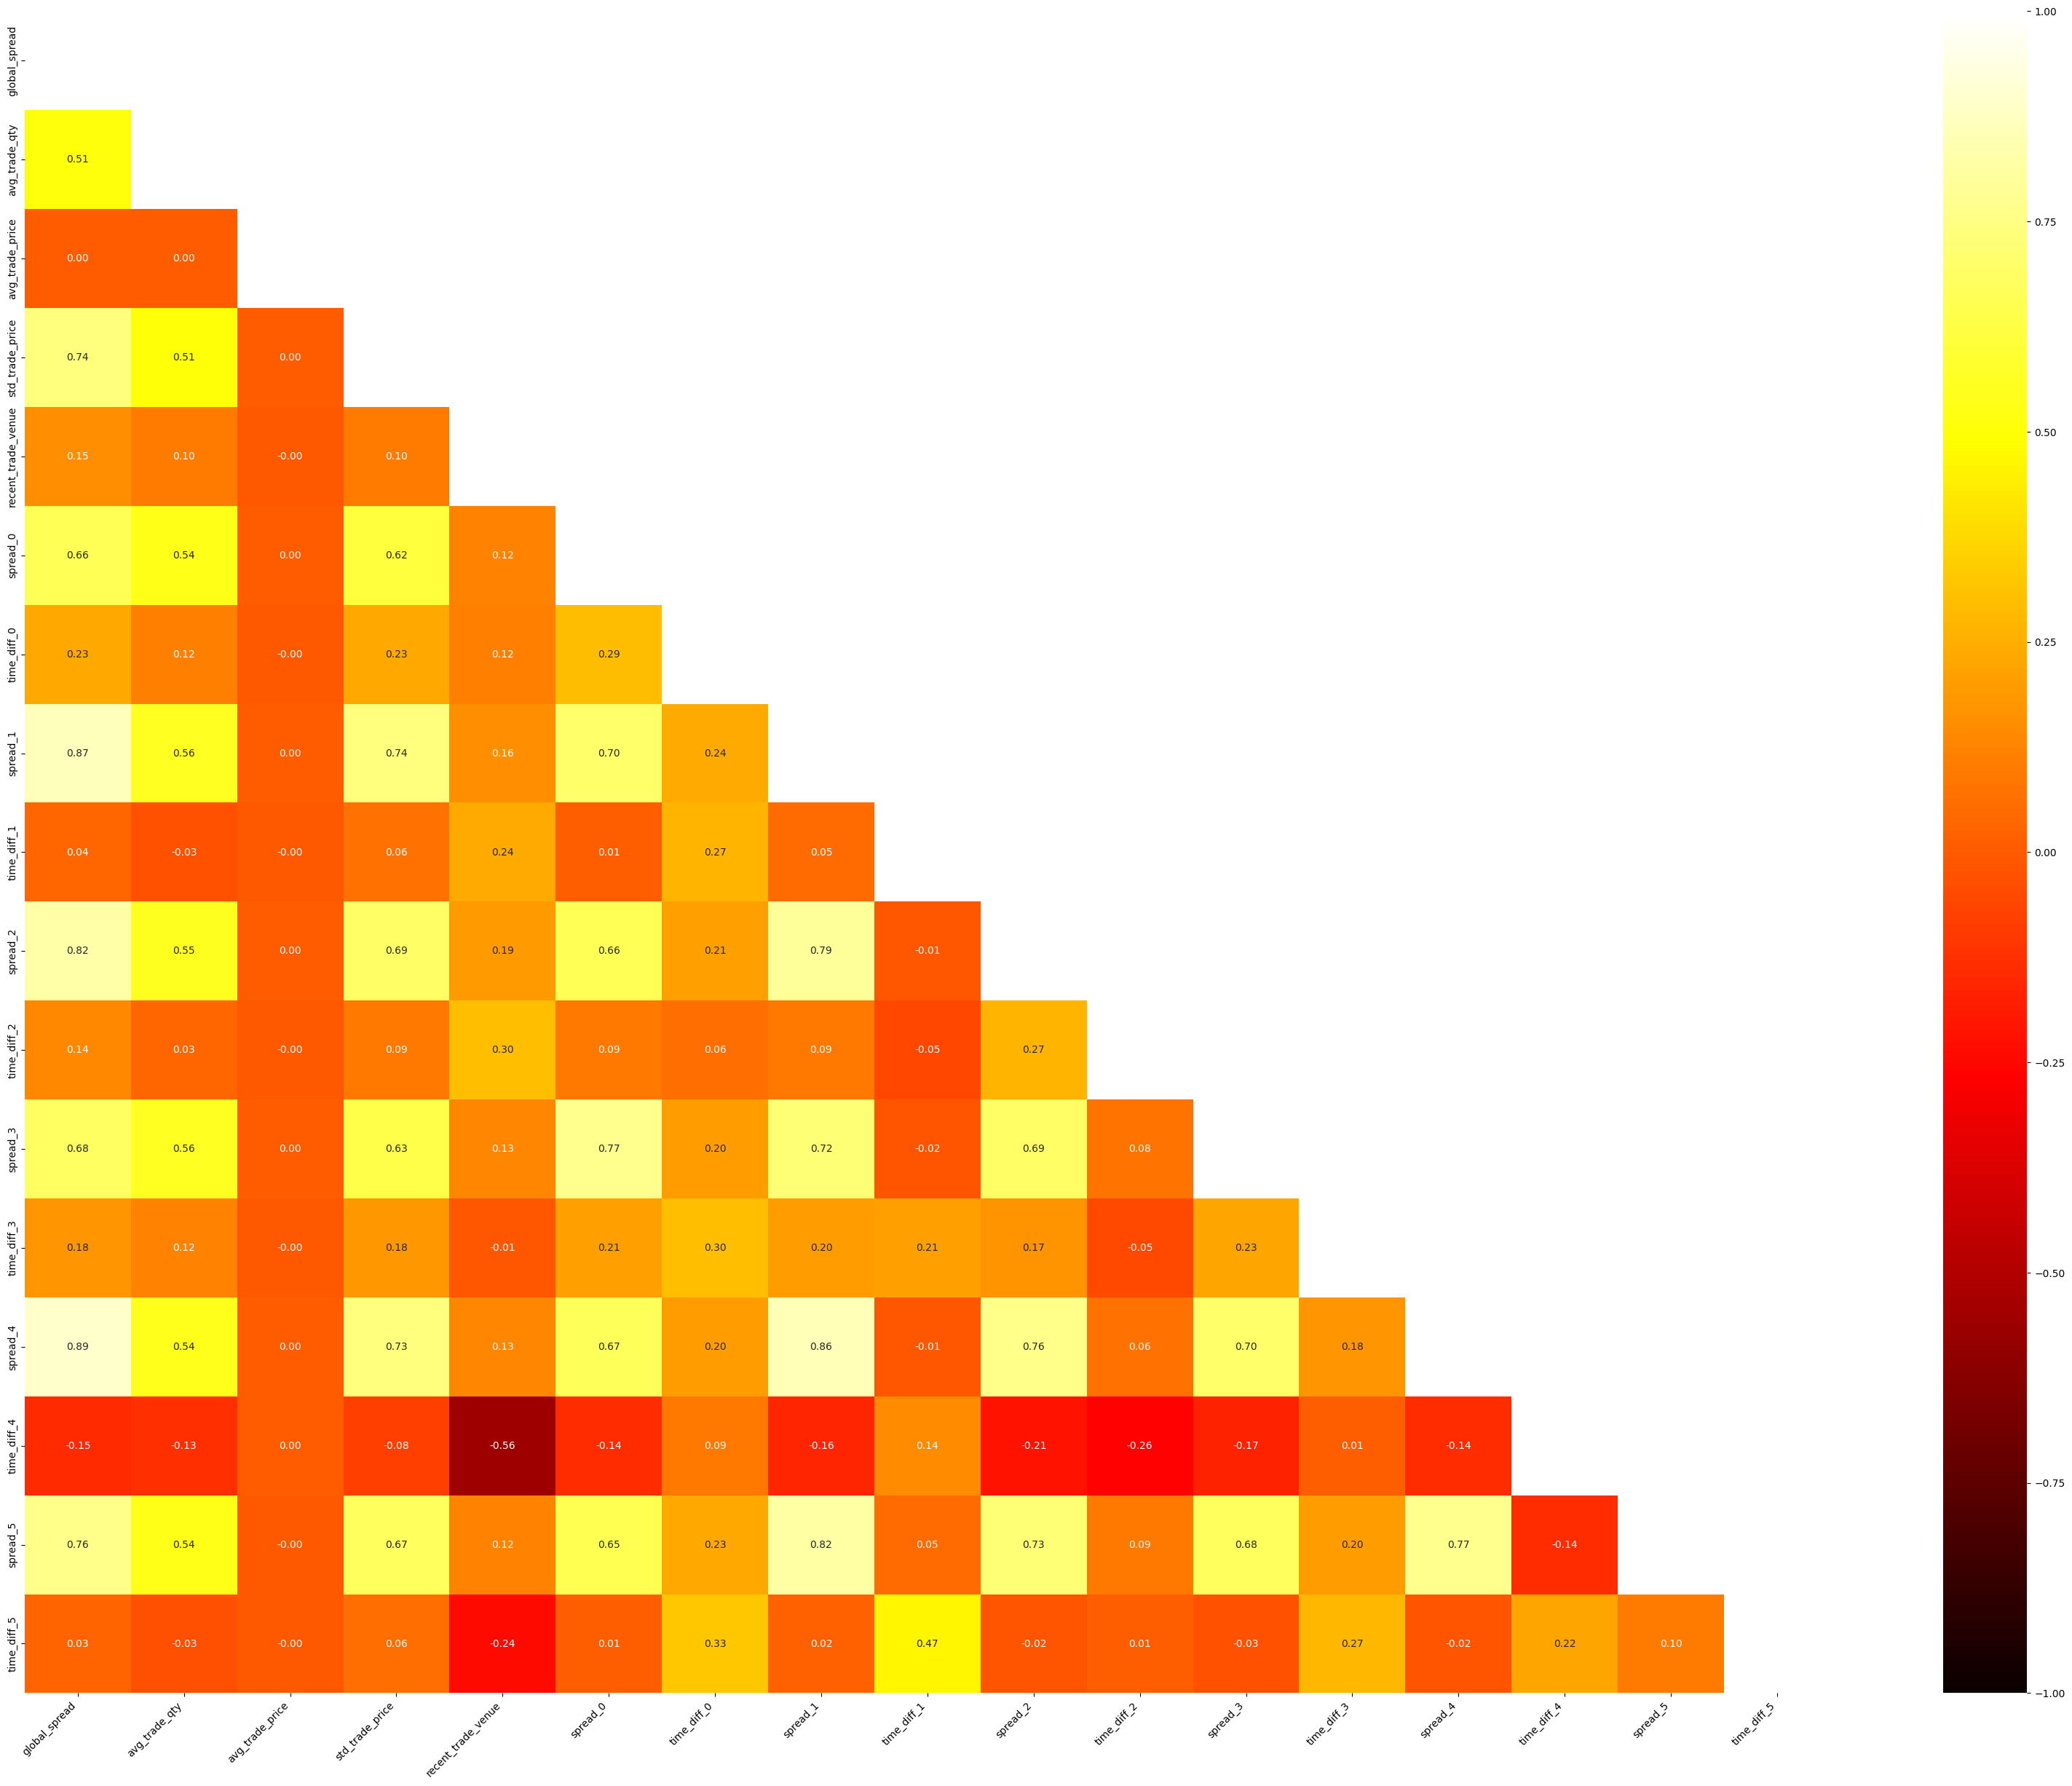

In [103]:
plot_correlation_matrix(x)

In [104]:
high_correlation_features(x)

,Feature 1,Feature 2,Correlation


### Escalado

In [105]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [106]:
y = targets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Pesos de las etiquetas

Si desean aplicar pesos de clase a un modelo de aprendizaje automático en scikit-learn, considerando que las clases tienen diferentes frecuencias y desean equilibrarlas, vemos cómo podrían enfocarlo basándose en sus datos:

* Usando "balanced": class_weight="balanced"

Si buscan un modo automático de equilibrar las clases en función de sus frecuencias, puedes utilizar la opción "balanced". Este modo ajusta automáticamente los pesos de forma inversamente proporcional a las frecuencias de las clases en los datos de entrada.

Se trata de un enfoque sencillo y a menudo eficaz cuando se trata de clases desequilibradas.

Si tienen conocimientos específicos sobre la importancia de cada puesto o si el equilibrio automático no produce resultados satisfactorios, pueden optar por ponderaciones personalizadas. Digamos, por ejemplo, que su exploración de datos indica que ciertos venues estan infrarrepresentados y, por lo tanto, se les debería dar más peso:


* class_weight = 
* {0: 2, # Venue 0, más peso
* 1: 1, # Venue 1, peso estándar
* 2: 1, #  Venue 2, peso estándar
* 3: 3... # Venue 3, aún más peso

El calculo de los pesos de cada clase se hace de la siguiente manera en "balanced":

In [107]:
# Count the occurrences of each class
class_counts = Counter(y_train)

# Calculate the total number of samples
n_samples = len(y_train)

# Number of classes
n_classes = len(class_counts)

# Calculate the weight for each class
class_weights = {
    class_label: (n_samples / (n_classes * count))
    for class_label, count in class_counts.items()
}

Este cálculo garantiza que las clases con frecuencias más bajas tengan un peso mayor, lo que las hace más importantes durante el entrenamiento de su modelo. La multiplicación por el número de clases garantiza que los pesos se normalicen en cierta medida, evitando que sean demasiado pequeños en conjuntos de datos con un gran número de muestras.

A continuación, puede pasar estos class_weights calculados al parámetro class_weight de los clasificadores en scikit-learn que lo soportan, como LogisticRegression, DecisionTreeClassifier, y otros.

Recuerde que la elección de la estrategia para calcular los pesos de clase puede depender de las características específicas de su conjunto de datos y de los objetivos de su tarea de modelado. El método anterior proporciona un enfoque equilibrado, pero puede necesitar ajustes en función de sus necesidades específicas o para hacer frente a desequilibrios extremos de clase.

### Regresiones logísticas simples y multivariadas, Random Forest y Boosting

#### Multinomial Logistic Regression

Un enfoque alternativo a la Regresion Logística consiste en cambiar el modelo de regresión logística para que admita directamente la predicción de múltiples etiquetas de clase. En concreto, para predecir la probabilidad de que un ejemplo de entrada pertenezca a cada etiqueta de clase conocida.

La distribución de probabilidad que define las probabilidades multiclase se denomina distribución de probabilidad multinomial. Un modelo de regresión logística adaptado para aprender y predecir una distribución de probabilidad multinomial se denomina regresión logística multinomial. De forma similar, podríamos referirnos a la regresión logística estándar o por defecto como Regresión Logística Binomial.

* Regresión logística binomial: Regresión logística estándar que predice una probabilidad binomial (es decir, para dos clases) para cada ejemplo de entrada.
* Regresión logística multinomial: Versión modificada de la regresión logística que predice una probabilidad multinomial (es decir, más de dos clases) para cada ejemplo de entrada.

In [108]:
# Initialize and train the Logistic Regression model with the 'multinomial' option
mnr_cl = LogisticRegression(
    penalty='elasticnet',
    solver="saga",
    max_iter=100,
    C=1, # Peso de la regularización L2 (por defecto)
    class_weight='balanced',
    verbose=True,
    l1_ratio=0.5,
)

# Chequear en la documentacion la relacion entre penalty y solver.

In [109]:
mnr_cl.fit(X_train, y_train)

Epoch 1, change: 1
Epoch 2, change: 0.1428168
Epoch 3, change: 0.062461018
Epoch 4, change: 0.040318898
Epoch 5, change: 0.030290012
Epoch 6, change: 0.023567934
Epoch 7, change: 0.01850448
Epoch 8, change: 0.014581204
Epoch 9, change: 0.011613199
Epoch 10, change: 0.0091628236
Epoch 11, change: 0.0073068333
Epoch 12, change: 0.0058030958
Epoch 13, change: 0.0046605649
Epoch 14, change: 0.0037001974
Epoch 15, change: 0.0029672788
Epoch 16, change: 0.0023597358
Epoch 17, change: 0.0018856137
Epoch 18, change: 0.001506947
Epoch 19, change: 0.0012058197
Epoch 20, change: 0.00096613883
Epoch 21, change: 0.00077116226
Epoch 22, change: 0.00061832417
Epoch 23, change: 0.00049273463
Epoch 24, change: 0.00039580241
Epoch 25, change: 0.00031617603
Epoch 26, change: 0.00025307255
Epoch 27, change: 0.00020346002
Epoch 28, change: 0.00016259232
Epoch 29, change: 0.00013038171
Epoch 30, change: 0.00010426826
convergence after 31 epochs took 41 seconds


LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.5,
                   penalty='elasticnet', solver='saga', verbose=True)

In [110]:
y_pred_mnr = mnr_cl.predict(X_test)

In [111]:
print('Training accuracy:')
print(accuracy_score(y_train, mnr_cl.predict(X_train)))

Training accuracy:
0.24492724634218047


In [112]:
print("Testing accuracy:")
print(accuracy_score(y_test, y_pred_mnr))

Testing accuracy:
0.2452960886655068


In [113]:
print(classification_report(y_pred_mnr, y_test))

              precision    recall  f1-score   support

           0       0.32      0.05      0.09     37267
           1       0.15      0.21      0.17     21619
           2       0.08      0.40      0.13      9602
           3       0.52      0.25      0.34     50442
           4       0.32      0.50      0.39     39640
           5       0.22      0.11      0.15     27658

    accuracy                           0.25    186228
   macro avg       0.27      0.25      0.21    186228
weighted avg       0.33      0.25      0.24    186228



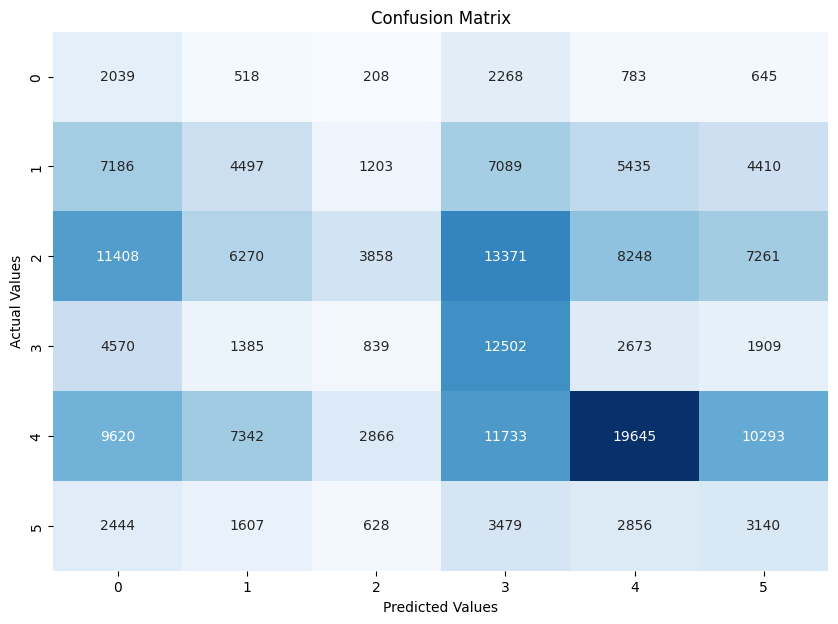

Los valores de las etiquetas de validación son: 
{(4,): 61499, (2,): 50416, (1,): 29820, (3,): 23878, (5,): 14154, (0,): 6461}


In [114]:
plot_confusion_matrix(y_test, y_pred_mnr)

In [115]:
#scores = cross_val_score(mnr_cl, X_test, y_test, cv=5, n_jobs=-1)

#### Random Forest

Un Bosque Aleatorio es como un equipo de toma de decisiones en grupo en el aprendizaje automático. Combina las opiniones de muchos "árboles" (modelos individuales) para hacer mejores predicciones, creando un modelo global más sólido y preciso.

La popularidad generalizada del algoritmo Random Forest se debe a su facilidad de uso y su adaptabilidad, que le permiten abordar eficazmente problemas tanto de clasificación como de regresión. La fuerza del algoritmo reside en su capacidad para manejar conjuntos de datos complejos y mitigar el sobreajuste, lo que lo convierte en una herramienta valiosa para diversas tareas de predicción en el aprendizaje automático.

Una de las características más importantes del algoritmo Random Forest es que puede manejar conjuntos de datos que contienen variables continuas, como en el caso de la regresión, y variables categóricas, como en el caso de la clasificación. Se comporta mejor en tareas de clasificación y regresión.

Random Forest puede trabajar con valores nulos

In [116]:
targets = data['source_id']
features = data.drop(columns=['source_id'])

In [117]:
features = feature_engineering(features)

In [118]:
# Define the feature columns. Start with global features, trade history, and then add per-venue features.
feature_columns = [
    "global_spread",
    "avg_trade_qty",
    "avg_trade_price",
    "std_trade_price",
    "recent_trade_venue",
]

# Add per-venue spreads and time difference features.
for i in range(6):
    feature_columns.append(f"spread_{i}")
    feature_columns.append(f"time_diff_{i}")

In [119]:
# Check which features exist in the DataFrame (to account for any missing columns).
existing_features = [col for col in feature_columns if col in features.columns]

In [120]:
x = features[existing_features]

In [121]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [122]:
y = targets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [123]:
# Train a Random Forest classifier.
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
# En caso de poner max_depth None que viene por defecto, la profundidad la define el entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [124]:
depths = [estimator.get_depth() for estimator in rf.estimators_]

# Inspect
print("Depths of all trees:", depths)
print("→ Deepest tree is:", np.max(depths))
print("→ Shallowest tree is:", np.min(depths))
print("→ Average depth is: {:.1f}".format(np.mean(depths)))

Depths of all trees: [50, 47, 51, 49, 52, 48, 49, 49, 55, 50, 51, 49, 56, 47, 49, 51, 50, 50, 56, 50, 53, 50, 51, 46, 48, 50, 51, 51, 49, 50, 51, 55, 52, 51, 49, 49, 50, 52, 51, 50, 49, 54, 50, 51, 49, 51, 50, 52, 50, 52, 48, 50, 51, 52, 53, 54, 50, 52, 52, 50, 53, 49, 51, 56, 47, 58, 52, 50, 53, 49, 49, 53, 52, 55, 50, 48, 50, 50, 51, 52, 53, 48, 51, 57, 50, 58, 50, 52, 51, 55, 49, 53, 53, 54, 51, 48, 48, 52, 49, 48]
→ Deepest tree is: 58
→ Shallowest tree is: 46
→ Average depth is: 51.0


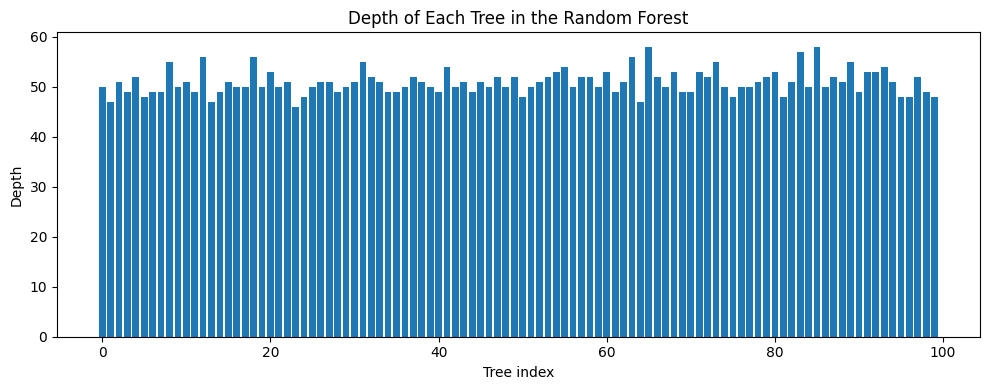

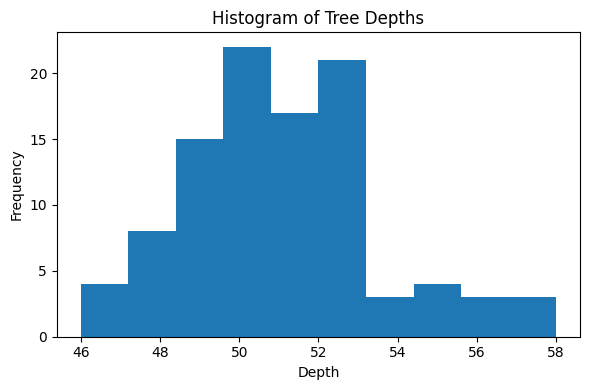

In [125]:
# 1) Bar plot of each tree's depth
plt.figure(figsize=(10, 4))
plt.bar(range(len(depths)), depths)
plt.xlabel("Tree index")
plt.ylabel("Depth")
plt.title("Depth of Each Tree in the Random Forest")
plt.tight_layout()
plt.show()

# 2) Histogram of tree depths
plt.figure(figsize=(6, 4))
plt.hist(depths)
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.title("Histogram of Tree Depths")
plt.tight_layout()
plt.show()

In [126]:
# Calculate predictions
y_pred_rf = rf.predict(X_test)

In [127]:
print(accuracy_score(y_train, rf.predict(X_train)))

1.0


In [128]:
print(accuracy_score(y_test, y_pred_rf))

0.46565955539806775


In [129]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09      6571
           1       0.39      0.16      0.23     30554
           2       0.44      0.58      0.50     50803
           3       0.48      0.35      0.41     23868
           4       0.50      0.69      0.58     65277
           5       0.41      0.08      0.13     14829

    accuracy                           0.47    191902
   macro avg       0.42      0.32      0.32    191902
weighted avg       0.45      0.47      0.43    191902



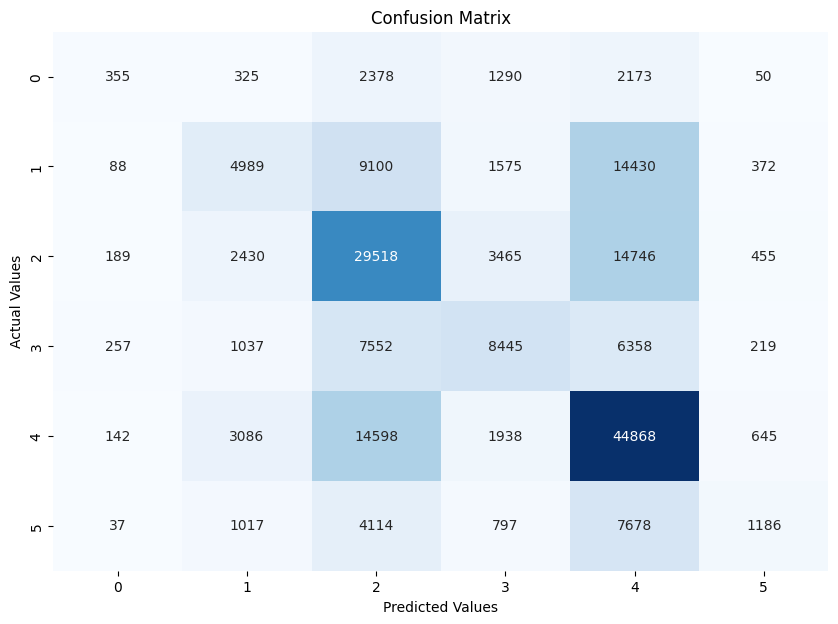

Los valores de las etiquetas de validación son: 
{(4,): 65277, (2,): 50803, (1,): 30554, (3,): 23868, (5,): 14829, (0,): 6571}


In [130]:
plot_confusion_matrix(y_test, y_pred_rf)

Vamos a limitar la profundidad por defecto del RF creando un nuevo modelo:

In [131]:
# Train a Random Forest classifier.
rf_depth = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight="balanced", max_depth=10)
# En caso de poner max_depth None que viene por defecto, la profundidad la define el entrenamiento
rf_depth.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1)

Depths of all trees: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
→ Deepest tree is: 10
→ Shallowest tree is: 10
→ Average depth is: 10.0


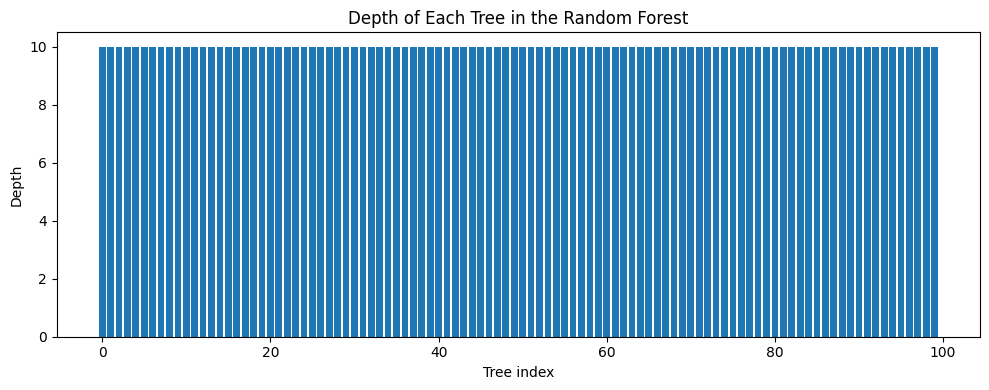

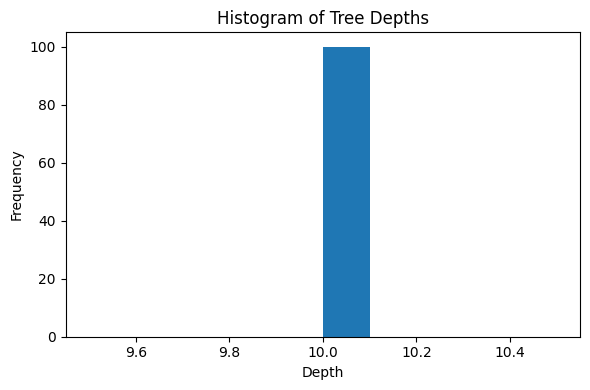

In [132]:
depths = [estimator.get_depth() for estimator in rf_depth.estimators_]

# Inspect
print("Depths of all trees:", depths)
print("→ Deepest tree is:", np.max(depths))
print("→ Shallowest tree is:", np.min(depths))
print("→ Average depth is: {:.1f}".format(np.mean(depths)))
# 1) Bar plot of each tree's depth
plt.figure(figsize=(10, 4))
plt.bar(range(len(depths)), depths)
plt.xlabel("Tree index")
plt.ylabel("Depth")
plt.title("Depth of Each Tree in the Random Forest")
plt.tight_layout()
plt.show()

# 2) Histogram of tree depths
plt.figure(figsize=(6, 4))
plt.hist(depths)
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.title("Histogram of Tree Depths")
plt.tight_layout()
plt.show()

In [133]:
# Calculate predictions
y_pred_rf_depth = rf_depth.predict(X_test)

In [134]:
print(accuracy_score(y_train, rf_depth.predict(X_train)))

0.4065989755134158


In [135]:
print(accuracy_score(y_test, y_pred_rf_depth))

0.3985575971068566


In [136]:
print(classification_report(y_test, y_pred_rf_depth))

              precision    recall  f1-score   support

           0       0.13      0.33      0.18      6571
           1       0.32      0.31      0.32     30554
           2       0.46      0.42      0.44     50803
           3       0.38      0.48      0.42     23868
           4       0.57      0.42      0.48     65277
           5       0.22      0.32      0.26     14829

    accuracy                           0.40    191902
   macro avg       0.35      0.38      0.35    191902
weighted avg       0.44      0.40      0.41    191902



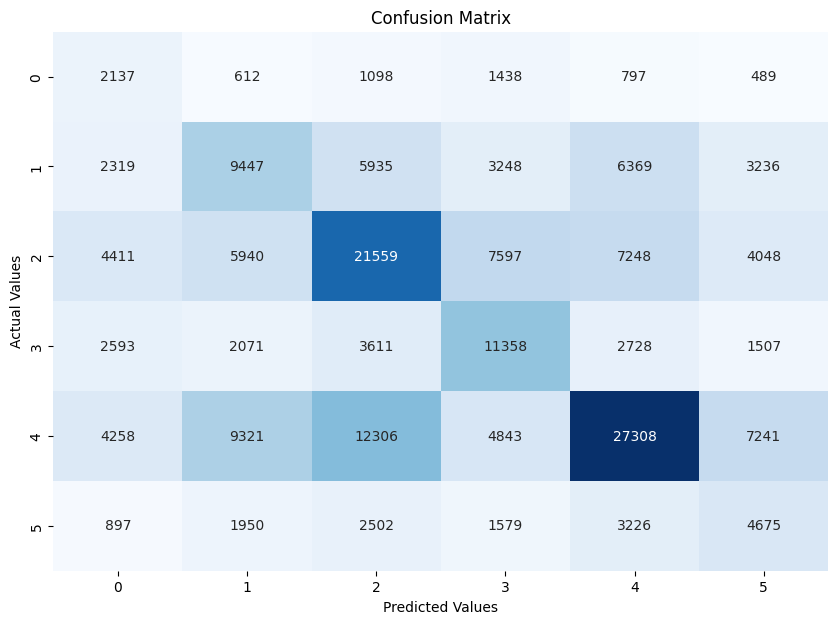

Los valores de las etiquetas de validación son: 
{(4,): 65277, (2,): 50803, (1,): 30554, (3,): 23868, (5,): 14829, (0,): 6571}


In [137]:
plot_confusion_matrix(y_test, y_pred_rf_depth)

In [138]:
#scores = cross_val_score(rf, X_test, y_test, cv=5, n_jobs=-1)

#### Categorical Boosting

CatBoost (Categorical Boosting) es un algoritmo de aprendizaje automático basado en árboles de decisión, especializado en manejar variables categóricas sin necesidad de preprocesarlas mediante codificación manual. Destaca por su robustez, velocidad y alta precisión, reduciendo la necesidad de ajuste exhaustivo de hiperparámetros. Es ampliamente utilizado en tareas de clasificación y regresión, especialmente cuando el conjunto de datos contiene variables categóricas abundantes o complejas.

Vamos a incluir el dia_id y el stock_id como variables categoricas

In [139]:
targets = data['source_id']
features = data.drop(columns=['source_id'])

In [140]:
features = feature_engineering(features)

In [141]:
# Define the feature columns. Start with global features, trade history, and then add per-venue features.
feature_columns = [
    "global_spread",
    "avg_trade_qty",
    "avg_trade_price",
    "std_trade_price",
    "recent_trade_venue",
    "stock_id",
    "day_id"
]

# Add per-venue spreads and time difference features.
for i in range(6):
    feature_columns.append(f"spread_{i}")
    feature_columns.append(f"time_diff_{i}")

In [142]:
# Check which features exist in the DataFrame (to account for any missing columns).
existing_features = [col for col in feature_columns if col in features.columns]

In [143]:
x = features[existing_features]

In [144]:
x = x.astype({"stock_id": "string", "day_id": "string"})

In [145]:
# List the columns you want to leave unchanged
exclude = ["stock_id", "day_id"]

x_scaled = x.copy()

#Identify which columns to scale
to_scale = [c for c in x_scaled.columns if c not in exclude]

# Fit & transform only those columns
scaler = MinMaxScaler()
x_scaled[to_scale] = scaler.fit_transform(x_scaled[to_scale])

In [146]:
y = targets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [147]:
cb = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.001,
    depth=10,
    verbose=100,
    task_type='GPU',
    loss_function='MultiClassOneVsAll',
    auto_class_weights='Balanced',
    one_hot_max_size=100,
    cat_features = ['stock_id', 'day_id']
)

In [148]:
cb.fit(X_train, y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6926636	total: 113ms	remaining: 9m 23s
100:	learn: 0.6487564	total: 9.78s	remaining: 7m 54s
200:	learn: 0.6123497	total: 19.5s	remaining: 7m 46s
300:	learn: 0.5819192	total: 29.6s	remaining: 7m 42s
400:	learn: 0.5563052	total: 40s	remaining: 7m 39s
500:	learn: 0.5346394	total: 50.4s	remaining: 7m 32s
600:	learn: 0.5162293	total: 1m 1s	remaining: 7m 27s
700:	learn: 0.5005356	total: 1m 12s	remaining: 7m 21s
800:	learn: 0.4871253	total: 1m 23s	remaining: 7m 16s
900:	learn: 0.4756357	total: 1m 34s	remaining: 7m 11s
1000:	learn: 0.4657665	total: 1m 46s	remaining: 7m 4s
1100:	learn: 0.4572756	total: 1m 58s	remaining: 6m 57s
1200:	learn: 0.4499437	total: 2m 9s	remaining: 6m 51s
1300:	learn: 0.4436071	total: 2m 22s	remaining: 6m 44s
1400:	learn: 0.4381212	total: 2m 34s	remaining: 6m 36s
1500:	learn: 0.4333622	total: 2m 46s	remaining: 6m 28s
1600:	learn: 0.4292209	total: 2m 58s	remaining: 6m 19s
1700:	learn: 0.4256033	total: 3m 10s	remaining: 6m 10s
1800:	learn: 0.4224476	total: 3m 

In [149]:
y_pred_cb = cb.predict(X_test)

In [151]:
print('Training Accuracy:')
print(accuracy_score(y_train, cb.predict(X_train)))

Training Accuracy:
0.41756556766249264


In [152]:
print(accuracy_score(y_test, y_pred_cb))

0.41236672885118447


In [153]:
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.14      0.34      0.19      6698
           1       0.35      0.31      0.33     30736
           2       0.47      0.45      0.46     50962
           3       0.39      0.46      0.42     24038
           4       0.60      0.43      0.50     64824
           5       0.22      0.34      0.27     14644

    accuracy                           0.41    191902
   macro avg       0.36      0.39      0.36    191902
weighted avg       0.45      0.41      0.42    191902



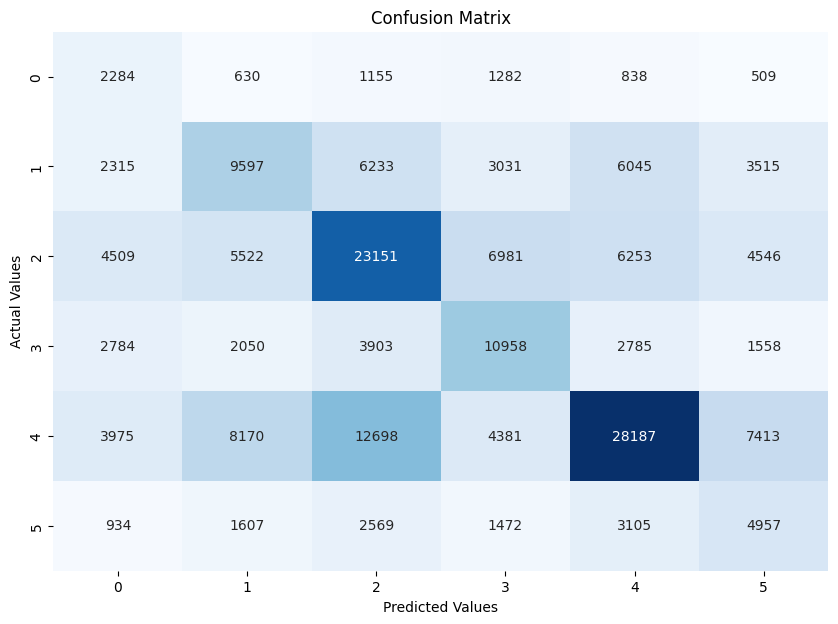

Los valores de las etiquetas de validación son: 
{(4,): 64824, (2,): 50962, (1,): 30736, (3,): 24038, (5,): 14644, (0,): 6698}


In [154]:
plot_confusion_matrix(y_test, y_pred_cb)

In [ ]:
# cross_val_score(cb, X_test, y_test, cv=5, n_jobs=-1, scoring='recall')

Ejercicio:

* Revisar las referencias y tratar de mejorar las matrices de confusión de los clasificadores. Correr la notebook en local.

### Referencias

* Categorical Boosting: https://catboost.ai/docs/en/
* Multilabel Classification Tutorial: https://github.com/catboost/tutorials/blob/master/classification/multilabel_classification_tutorial.ipynb

* Multinomial Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Multinomial Logistic Regression With Python: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

* Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Understand Random Forest Algorithms With Examples (Updated 2024): https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)